# Producing the hourly dataset

With the model(s) from `train_fluxnet_models.ipynb` we can now produce the hourly datasets for GPP/NEE/respiration.

To do so, you select the model folder corresponding to the trained model and specify to which output directory the results should be written to.

In [ ]:
from dask.distributed import Client
from excited_workflow.produce_fluxnet_dataset import produce_dataset

client = Client(n_workers=2, threads_per_worker=2)

produce_dataset(  # takes ~40 minutes for 5 years of data
    model_dir="/data/volume_2/trained_models/fluxnet_gpp-lightgbm-2024-01-17_10_08",
    output_dir="/data/volume_2/produced_models/test"
)

To demonstrate the results, we can open the resulting (multi-file) dataset and plot the GPP for one timestep:

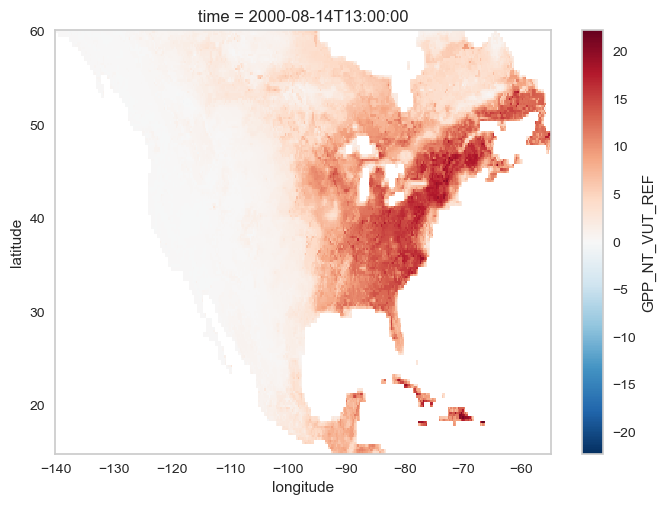

In [2]:
import xarray as xr
ds = xr.open_mfdataset("/data/volume_2/produced_models/test/*.nc")
ds["GPP_NT_VUT_REF"].isel(time=4002).plot()

The time series (daily average) for a single location looks like the following:

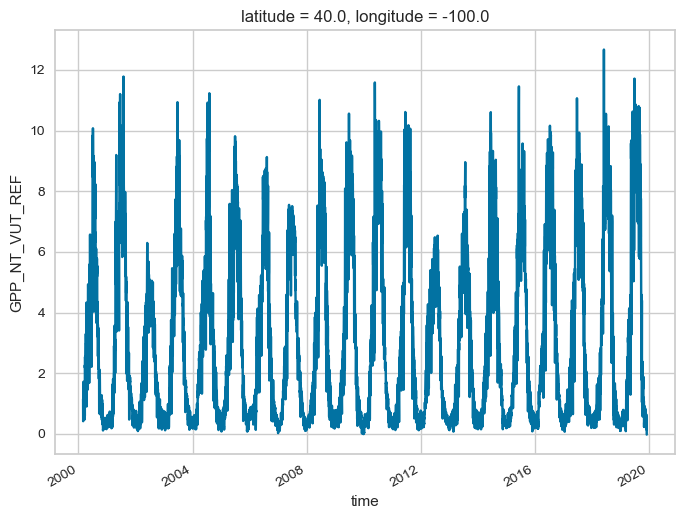

In [4]:
one_loc = ds["GPP_NT_VUT_REF"].sel(latitude=40, longitude=-100, method="nearest")
one_loc.resample(time="1D").mean().plot()

We can also study the average diurnal cycle at the same location:

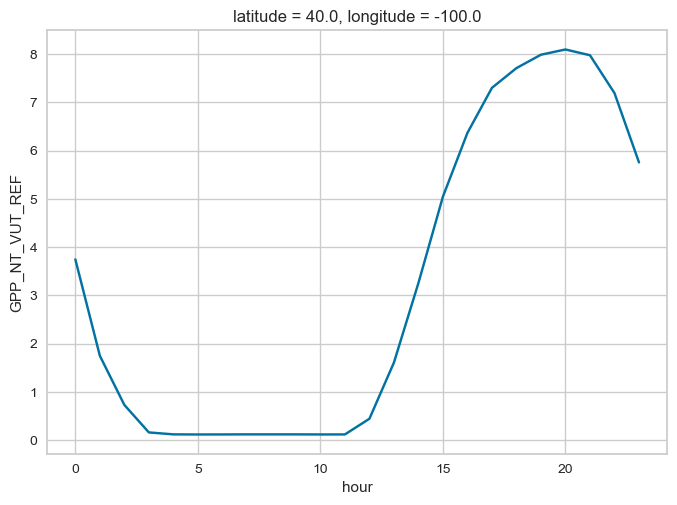

In [5]:
one_loc.groupby(one_loc["time"].dt.hour).mean().plot()